# Linear regression notation for models with multiple predictors

This page will introduce the notation for linear regression models with
multiple predictor variables, expanding on the notation which we have already
seen for [linear regression models with a single
predictor](lin_regression_notation).
 
We will add the same caveat as before: this page will most likely be
challenging if you are new to this, so please do not worry if you do not
understand some concepts the first time you read them.

But do keep reading, and re-reading.  You'll get there.

In [1]:
# Import numerical and plotting libraries
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import pandas as pd

# For displaying variables in mathematical form.
from jupyprint import jupyprint, arraytex

# Only show 6 decimals when printing arrays.
np.set_printoptions(precision=6)

# The Scipy statistics submodule, for linregress
import scipy.stats as sps

# For interactive widgets.
from ipywidgets import interact

We will again use the Duncan (1961) occupational prestige dataset. The dataset
combines information from the 1950 U.S. Census with data collected by the
National Opinion Research Centre (NORC). The Census data contained information
about different occupations, such as the percentage of people working in that
occupation who earned over a certain amount per year. The NORC data was from
a survey which asked participants to rate how prestigious they considered each
occupation. Here are the descriptions of the variables in the dataset, which
covers 45 occupations (adapted from
[here](https://rdrr.io/cran/carData/man/Duncan.html)):

* `name` - the name of the occupation, from the 1950 US Census
* `type`- type of occupation, with the following categories ``prof``,
  professional and managerial; ``wc``, white-collar; ``bc``, blue-collar. (E.g.
  how the occupation was classified in the 1950 US Census)
* `income` - percentage of census respondents within the occupation who earned
  3,500 dollars or more per year (about 36,000 US dollars in 2017)
* `education` - percentage of census respondents within the occupation who were
  high school graduates 
* `prestige` - percentage of respondents in the NORC survey who rated the
  occupation as “good” or better in prestige

See [the dataset
page](https://github.com/odsti/datasets/tree/main/duncan_occupations) for more
detail.

Again, we will restrict our attention to the first 15 observations in the
dataset (to make it easier to visualise/think about the concepts):

In [2]:
# read in the data
df = pd.read_csv("data/Duncan_Occupational_Prestige.csv")

# restrict our attention to the first 15 rows
df = df.head(15)

# show the data
df

,name,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90
5,minister,prof,21,84,87
6,professor,prof,64,93,93
7,dentist,prof,80,100,90
8,reporter,wc,67,87,52
9,engineer,prof,72,86,88


The observational units in this dataset are professions, and you'll remember from the previous page, that the linear regression model we fit was as follows:

`prestige` = $b * $ `education` + $ \text{c} + \vec{\varepsilon} $

The model equation reads as "we are modeling `prestige` as a linear function of
`education`, plus `error`".

The `error` is the randomness that remains after the straight line relationship
between `education` and `prestige` is accounted for e.g. the y-axis distance
between each data point and the line of best fit.

Remember that `prestige` and `education` are vectors of 15 values.

Just for ease of typing, let's store the vectors again as separate python
variables.

In [3]:
# store the education values as a variable
education = np.array(df['education'])

# show the values
education

array([ 86,  76,  92,  90,  86,  84,  93, 100,  87,  86,  74,  98,  97,
        84,  91])

In [4]:
# store the prestige values as a variable 
prestige = np.array(df['prestige'])

# show the values
prestige

array([82, 83, 90, 76, 90, 87, 93, 90, 52, 88, 57, 89, 97, 59, 73])

In [5]:
# Remember we might also want to refer to these vectors (in python) by the
# names we will use for mathematical notation.
x = education
y = prestige

We learned the mathematical notation for the model we fit previously:

$ \vec{y} = b \vec{x} + \text{c} + \vec{\varepsilon} $

$\begin{bmatrix}{} \text{$y_{1}$} \\ \text{$y_{2}$} \\ \text{$y_{3}$} \\ \text{$y_{4}$} \\ \text{$y_{5}$} \\ \text{$y_{6}$} \\ \text{$y_{7}$} \\ \text{$y_{8}$} \\ \text{$y_{9}$} \\ \text{$y_{10}$} \\ \text{$y_{11}$} \\ \text{$y_{12}$} \\ \text{$y_{13}$} \\ \text{$y_{14}$} \\ \text{$y_{15}$} \\ \end{bmatrix} = b * \begin{bmatrix}{} \text{$x_{1}$} \\ \text{$x_{2}$} \\ \text{$x_{3}$} \\ \text{$x_{4}$} \\ \text{$x_{5}$} \\ \text{$x_{6}$} \\ \text{$x_{7}$} \\ \text{$x_{8}$} \\ \text{$x_{9}$} \\ \text{$x_{10}$} \\ \text{$x_{11}$} \\ \text{$x_{12}$} \\ \text{$x_{13}$} \\ \text{$x_{14}$} \\ \text{$x_{15}$} \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

Run the cell below which will remind us how the model looks with the data from our actual `prestige` and `education` vectors:

In [6]:
# do not worry about this code, it just prints the mathematical notation below this cell
jupyprint("Here is the our model ($ \\vec{y} = b \\vec{x} + \\text{c} + \\vec{\\varepsilon} $), showing the actual values within the `education` and `prestige` vectors:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = b * {arraytex(np.atleast_2d(education).T)} + c +" +" \\begin{bmatrix}{} \\text{$\\varepsilon_{1}$} \\\\ \\text{$\\varepsilon_{2}$} \\\\ \\text{$\\varepsilon_{3}$} \\\\ \\text{$\\varepsilon_{4}$} \\\\ \\text{$\\varepsilon_{5}$} \\\\ \\text{$\\varepsilon_{6}$} \\\\ \\text{$\\varepsilon_{7}$} \\\\ \\text{$\\varepsilon_{8}$} \\\\ \\text{$\\varepsilon_{9}$} \\\\ \\text{$\\varepsilon_{10}$} \\\\ \\text{$\\varepsilon_{11}$} \\\\ \\text{$\\varepsilon_{12}$} \\\\ \\text{$\\varepsilon_{13}$} \\\\ \\text{$\\varepsilon_{14}$} \\\\ \\text{$\\varepsilon_{15}$} \\\\ \\end{bmatrix}$")

Here is the our model ($ \vec{y} = b \vec{x} + \text{c} + \vec{\varepsilon} $), showing the actual values within the `education` and `prestige` vectors:

$\begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix} = b * \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

Just to remind ourselves about the parameter estimates $b$ and $c$ of the
best-fitting line, let's fit the model again.

As we will be fitting several different models on this page, we will store the
slope and intercept using python variable names which indicate which model they
are from. In this case we will use `b_education` and `c_education` to indicate
that they are the slope and intercept from a linear regression using
`education` as the predictor variable:

*Note*: `prestige` will always be the outcome variable, for all models fit on
this page.

In [7]:
# fit a linear regression model, using scipy
res = sps.linregress(education, prestige)

# store the slope (b) and the intercept (c) as separate variables
b_education = res.slope
c_education = res.intercept

# show the slope and intercept
jupyprint("For the model (`prestige` = $b * $ `education` + $ \\text{c} + \\vec{\\varepsilon}) $,"+f" the slope is {b_education.round(2)} and the intercept is {c_education.round(2)}.")

For the model (`prestige` = $b * $ `education` + $ \text{c} + \vec{\varepsilon}) $, the slope is 1.01 and the intercept is -8.38.

Here are the data, and the fitted values from the model, shown graphically:

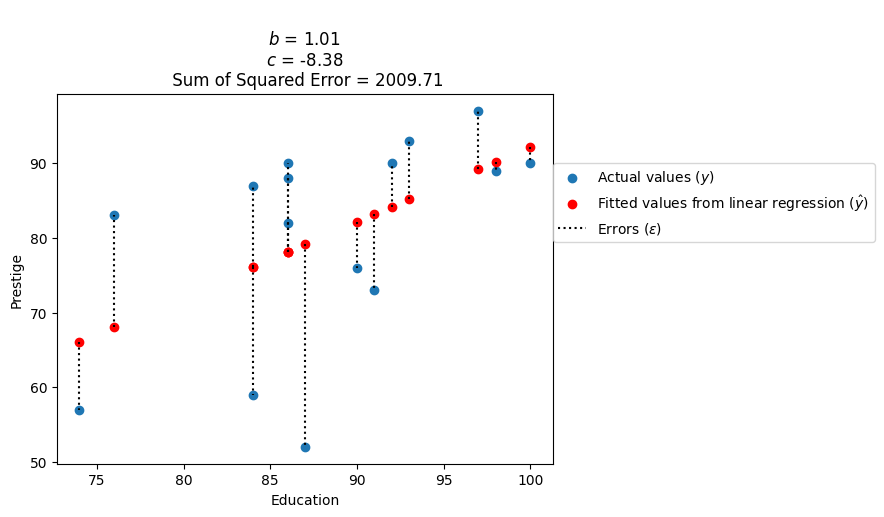

In [8]:
# do not worry about this code, it is just a convenience function to plot the data
def make_scatter(with_errors=False,
                 show=False,
                 return_errors=False,
                 b=b_education,
                 c=c_education,
                 x=education,
                 y=prestige,
                 xlabel='Education',
                 ylabel='Prestige',
                 legend_loc=(1, 0.6),
                 continuous_line=False):
    plt.scatter(x, y, label='Actual values ($y$)')
    # plot the predicted values
    fitted = b * x + c
    if continuous_line == False:
        plt.plot(x, fitted, 'ro', label='Fitted values from linear regression ($\hat{y}$)')
    elif continuous_line == True:
        x_for_plot = np.linspace(x.min(), x.max())
        fitted_for_plot = b * x_for_plot + c
        plt.plot(x_for_plot, fitted_for_plot, 'ro', label='Edge of linear regression plane ($\hat{y}$)')
    if with_errors == True:
        # plot the distance between predicted and actual, for all points.
        n = len(x)
        for i in range(n):
            plt.plot([x[i], x[i]], [fitted[i], y[i]], 'k:')
        # the following code line is just to trick Matplotlib into making a new
        # a single legend entry for the dotted lines.
        plt.plot([], [], 'k:', label='Errors ($ \\varepsilon $)')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"\n$b$ = {round(b,2)} \n$c$ = {round(c,2)} \n Sum of Squared Error = {round(np.sum((prestige - (b*x + c))**2), 2)}")
    # show the legend
    plt.legend(loc = legend_loc);
    if show == True:
        plt.show()
    # return and show the error vector?
    if return_errors == True:
        errors = y - fitted
        jupyprint(f"Here is the error vector for the current line: {arraytex(np.atleast_2d(errors.round(2)).T)}")
        jupyprint(f"The sum of the squared error is <b> {round(np.sum((errors)**2),2)}. </b>")
        return errors 

# some other convenience functions
def make_scatter_line_comparison(b, c):
    # Call the make_scatter function with some defaults.
    errors = make_scatter(with_errors = True,
                          return_errors = True,
                          b = b,
                          c = c,
                          show = True)
    return errors

# generate the plot.
make_scatter(with_errors=True)

## Linear regression using `scipy.optimize`

In order to make sense of the notation for having multiple predictors in the
model, we need to pay attention to the *cost function* used in linear
regression. The method of fitting regression models we used above, and on the
previous page, involves a pre-written function (`scipy.stats.linregress`) which
uses its own cost function.

Because the `scipy` library is open source, we can look at the cost function it
uses. But, to deepen our understanding of the notation for linear regression
with multiple predictors, let's re-visit another method of fitting linear
regression models, which you've already seen on a [previous
page](https://lisds.github.io/textbook/mean-slopes/finding_lines.html).

Here we write our own *cost function*.  The *cost function* for a line is
a function that returns a quality-of-fit value for a particular line.  That is,
it accepts parameters of the slope and intercept defining the line, and returns
a value that will be *low* (low cost) for a well-fitting line, and *high* (high
cost) for a poorly fitting line.

We have seen different cost functions for linear regression before [on this
page](https://lisds.github.io/textbook/mean-slopes/sse_rmse.html). You'll
recall that we can use the *sum of the squared* errors or the *root mean
squared error* - they will identify the same slope and intercept as giving the
lowest cost. As we are working with a small number of observations, let's use
the sum of the squared errors.

The cell below defines a function which takes a sequence (`b_and_c`) containing
a slope and an intercept value. It then calculates fitted values for that slope
and intercept pair, using the formula we saw on the [linear regression notation
page](https://nbviewer.org/github/pxr687/temp_page/blob/main/lin_regression_notation.ipynb)

In [9]:
def ss_any_line(b_and_c, x_vector, y_vector):
    """ Sum of squares error for slope, intercept `b_and_c`
    """
    # unpack the list containing the slope and the intercept
    b, c = b_and_c

    # calculate the fitted values, for this slope/intercept pairing
    fitted = b*x_vector + c

    # calculate the error vector
    error = y_vector - fitted

    # return the value of the cost function (the cost).
    return np.sum(error ** 2)

Let's see what the sum of squared error is for an arbitrarily chosen slope and
intercept value.

In [10]:
# arbitrary slope and intercept pair
arbitrary_slope_intercept_pair = [10, 10]

# Calculating the sum of squared error using our function
ss_any_line(arbitrary_slope_intercept_pair, education, prestige)

9960384

The graph below shows the line that results from this slope and intercept pair,
along with the original data (blue dots) and the errors (black dashed lines).

Remember the mathematical form of a linear regression model with a single
predictor:

$ \vec{y} = b \vec{x} + \text{c} + \vec{\varepsilon} $

$\begin{bmatrix}{} \text{$y_{1}$} \\ \text{$y_{2}$} \\ \text{$y_{3}$} \\ \text{$y_{4}$} \\ \text{$y_{5}$} \\ \text{$y_{6}$} \\ \text{$y_{7}$} \\ \text{$y_{8}$} \\ \text{$y_{9}$} \\ \text{$y_{10}$} \\ \text{$y_{11}$} \\ \text{$y_{12}$} \\ \text{$y_{13}$} \\ \text{$y_{14}$} \\ \text{$y_{15}$} \\ \end{bmatrix} = b * \begin{bmatrix}{} \text{$x_{1}$} \\ \text{$x_{2}$} \\ \text{$x_{3}$} \\ \text{$x_{4}$} \\ \text{$x_{5}$} \\ \text{$x_{6}$} \\ \text{$x_{7}$} \\ \text{$x_{8}$} \\ \text{$x_{9}$} \\ \text{$x_{10}$} \\ \text{$x_{11}$} \\ \text{$x_{12}$} \\ \text{$x_{13}$} \\ \text{$x_{14}$} \\ \text{$x_{15}$} \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

Let's make sure we can relate all aspects of the notation to the graph below
(the error vector for this slope/intercept pair, as well as the sum of the
squared error is shown below the graph):

*Note*: if you are using this notebook interactively, try and use a few
different slope and intercept pairs by changing the value of `b` and `c` in the
input to the `make_scatter` function in the cell below:

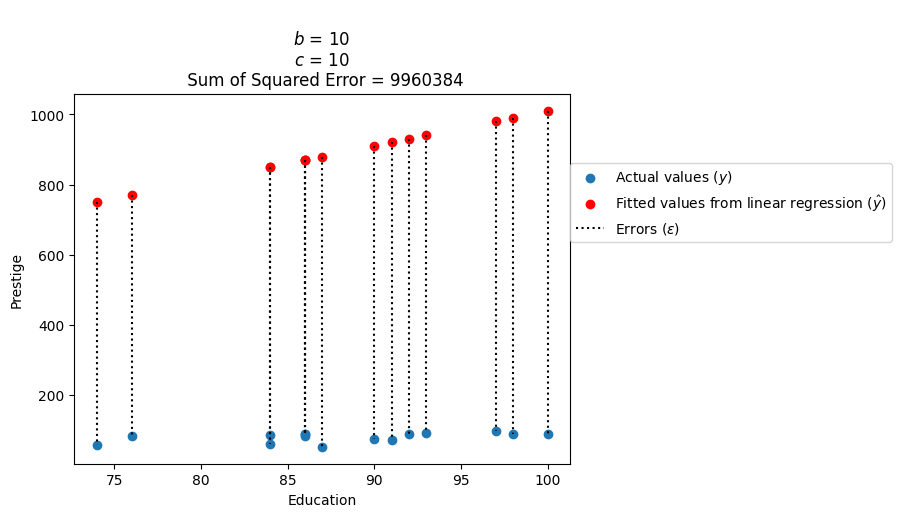

Here is the error vector for the current line: \begin{bmatrix}{} -788 \\ -687 \\ -840 \\ -834 \\ -780 \\ -763 \\ -847 \\ -920 \\ -828 \\ -782 \\ -693 \\ -901 \\ -883 \\ -791 \\ -847 \\ \end{bmatrix}

The sum of the squared error is <b> 9960384. </b>

In [11]:
# tyr some different arbitrary slope and intercept pairs
arbitrary_slope_intercept_pair = [10, 10]

# do not worry about this code, it just generates the plot/printouts
errors_from_guess = make_scatter_line_comparison(b = arbitrary_slope_intercept_pair[0],
                                                 c = arbitrary_slope_intercept_pair[1])

Let's compare this to the graph, the error vector and the sum of the squared
error value from our arbitrarily guessed pairing to those from the parameter
estimates for the best-fitting line:

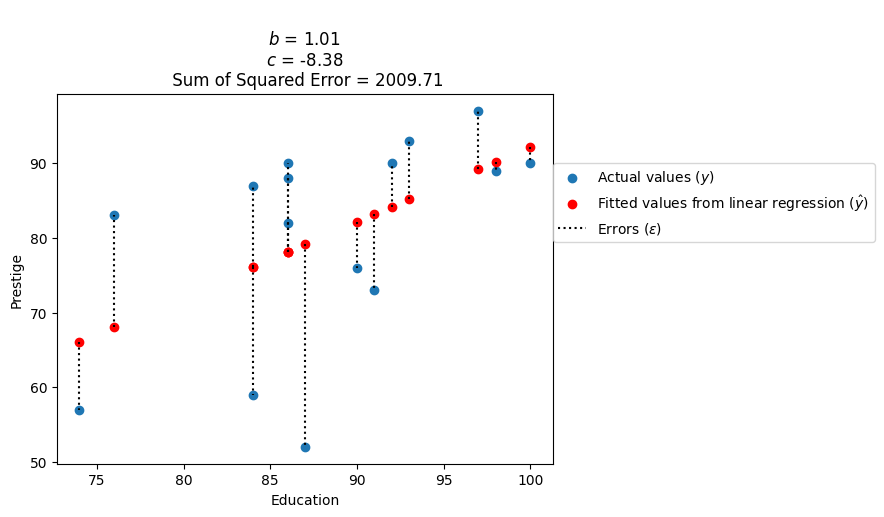

Here is the error vector for the current line: \begin{bmatrix}{} 3.88 \\ 14.94 \\ 5.84 \\ -6.14 \\ 11.88 \\ 10.89 \\ 7.84 \\ -2.2 \\ -27.13 \\ 9.88 \\ -9.05 \\ -1.19 \\ 7.82 \\ -17.11 \\ -10.15 \\ \end{bmatrix}

The sum of the squared error is <b> 2009.71. </b>

In [12]:
# the best-fitting line
errors_education = make_scatter_line_comparison(b = b_education, c = c_education)

We can see that when we compare the badly fitting line with the best-fitting
line the value of the cost function (the sum of squared error, calculated via
our `ss_any_line` function) is smaller for the best fitting line.

Just now, and on the [regression notation
page](https://nbviewer.org/github/pxr687/temp_page/blob/main/lin_regression_notation.ipynb)
we used the `scipy.stats.linregress` function to quickly fit our regression.
This essentially fits the model using a cost function that is internal to
`scipy.stats.linregress` — we do not get to control the cost function.

Let's refresh our memories on how to find the parameter estimates using a cost
function which we have written. We do this by passing our cost function
(`ss_any_line`) to the `minimize` function from the `scipy.optimize`.
`scipy.optimize` uses an efficient method to try a variety of slope/intercept
pairings until it finds the pair which give the minimum value of the cost
function:

In [13]:
# import minimize
from scipy.optimize import minimize

# An initial guess at the slope/intercept pair, for `minimize` to start with.
initial_guess = [1, 1]

# Minimizing the sum of squares error
min_ss = minimize(ss_any_line, # the function we are minimizing
                  initial_guess, # a list of initial guesses for the parameters
                  args=(education, prestige)) # other arguments to give to the `minimize` function
min_ss

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2009.7071828056132
        x: [ 1.006e+00 -8.383e+00]
      nit: 5
      jac: [ 1.526e-05 -1.526e-05]
 hess_inv: [[ 4.907e-04 -4.322e-02]
            [-4.322e-02  3.840e+00]]
     nfev: 91
     njev: 28

Let's pull out our parameter estimates, from the output of `minimize`, so that
we can compare them to the values we got above from `scipy.stats.linregress`:

In [14]:
# get out our parameter estimates
min_ss.x

array([ 1.005853, -8.383276])

In [15]:
# compare the slope of the best-fitting line we got from scipy.stats.linregress
jupyprint(f'linregress slope:  {b_education}')

linregress slope:  1.0058545962950014

In [16]:
# compare the intercept of the best-fitting line we got from scipy.stats.linregress
jupyprint(f'linregress intercept: {c_education}')

linregress intercept: -8.383432366305456

Both of these approaches (using `scipy.stats.linregress` or using `minimize`
with our cost function `ss_any_line`) return the same (near as dammit)
parameter estimates.   This is because `linregress` uses the mathematical
shortcut to the calculation of the least-squares slope and intercept.  That is,
the mathematics behind `linregress` is using the sum-of-squares (or mean square
or root mean square) cost function.

The benefit of writing our own cost function is firstly that it gives us
a better understanding of how we are getting our parameter estimates, and
secondly that we can customize the cost function. Minimizing cost functions is
a key concept in machine learning, so you can think of this approach as
a foundational machine learning concept, applying to newer machine learning
methods, as well as to classical statistical methods like linear regression.

Let's just recap how the process of fitting a linear regression model (with one
predictor variable) works, with reference to the mathematical notation:

$\begin{bmatrix}{} \text{$y_{1}$} \\ \text{$y_{2}$} \\ \text{$y_{3}$} \\ \text{$y_{4}$} \\ \text{$y_{5}$} \\ \text{$y_{6}$} \\ \text{$y_{7}$} \\ \text{$y_{8}$} \\ \text{$y_{9}$} \\ \text{$y_{10}$} \\ \text{$y_{11}$} \\ \text{$y_{12}$} \\ \text{$y_{13}$} \\ \text{$y_{14}$} \\ \text{$y_{15}$} \\ \end{bmatrix} = b * \begin{bmatrix}{} \text{$x_{1}$} \\ \text{$x_{2}$} \\ \text{$x_{3}$} \\ \text{$x_{4}$} \\ \text{$x_{5}$} \\ \text{$x_{6}$} \\ \text{$x_{7}$} \\ \text{$x_{8}$} \\ \text{$x_{9}$} \\ \text{$x_{10}$} \\ \text{$x_{11}$} \\ \text{$x_{12}$} \\ \text{$x_{13}$} \\ \text{$x_{14}$} \\ \text{$x_{15}$} \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

Let's think about what the `minimize` function is doing here, with reference to
this notation:

- Our $x$ and $y$ vectors are fixed, they are given by our dataset (in our case
  `education` is our $x$ vector and `prestige` is our $y$ vector).
- We write a cost function (`ss_any_line`) which takes a value of $b$ and $c$
  and then returns the "cost" for those parameters, given our our $x$ and $y$
  vectors.
  - It does this by generating fitted values using $b$ and $c$,
  subtracting these fitted values from the actual `prestige` scores to generate
  the error vector, and then squaring the values in the error vector and adding
  them up (to calculate the sum of squared error for this specific $b$ and $c$
  pairing).
- We pass our cost function to `minimize` and it tries multiple $b$ and $c$
  pairs until it finds the pair that gives the lowest value of the cost
  function, out of all possible $b$ and $c$ pairs.

## Exploring other models

So far we've refreshed our knowledge of how we can use `minimize` on the sum of
squared errors cost function (`ss_any_line`) to get our parameter estimates
($b$ and $c$) for linear regression.

We've done this using `education` as our predictor, and `prestige` as our
outcome.

However, there are other potential predictor variables in the Duncan dataset,
which might be relevant to predicting occupational `prestige`.

In [17]:
# Showing the data, again.
df

,name,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90
5,minister,prof,21,84,87
6,professor,prof,64,93,93
7,dentist,prof,80,100,90
8,reporter,wc,67,87,52
9,engineer,prof,72,86,88


Let's investigate the relationship between `income` and `prestige`. Reasonably,
we might predict *a priori* (before analysing the data) that higher paid jobs
might be more prestigious.

Let's store our `income` scores as a separate python variable.

In [18]:
# Store the education values as a variable.
income = np.array(df['income'])

# Show the values.
income

array([62, 72, 75, 55, 64, 21, 64, 80, 67, 72, 42, 76, 76, 41, 48])

> **Before we continue**: we would like you to do an exercise, for some practice.
>
> We would like you to fit the following model, using the `scipy.optimize`
method first, then checking your results with the `scipy.stats.linregress`
method:
>
> `prestige` = $b * $ `income` + $ \text{c} + \vec{\varepsilon} $

The cell below shows the model, with the actual data in the vectors:

In [19]:
# do not worry about this code, it just generates the printout below
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = b * {arraytex(np.atleast_2d(income).T)} + c +" +" \\begin{bmatrix}{} \\text{$\\varepsilon_{1}$} \\\\ \\text{$\\varepsilon_{2}$} \\\\ \\text{$\\varepsilon_{3}$} \\\\ \\text{$\\varepsilon_{4}$} \\\\ \\text{$\\varepsilon_{5}$} \\\\ \\text{$\\varepsilon_{6}$} \\\\ \\text{$\\varepsilon_{7}$} \\\\ \\text{$\\varepsilon_{8}$} \\\\ \\text{$\\varepsilon_{9}$} \\\\ \\text{$\\varepsilon_{10}$} \\\\ \\text{$\\varepsilon_{11}$} \\\\ \\text{$\\varepsilon_{12}$} \\\\ \\text{$\\varepsilon_{13}$} \\\\ \\text{$\\varepsilon_{14}$} \\\\ \\text{$\\varepsilon_{15}$} \\\\ \\end{bmatrix}$")

$\begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix} = b * \begin{bmatrix}{} 62 \\ 72 \\ 75 \\ 55 \\ 64 \\ 21 \\ 64 \\ 80 \\ 67 \\ 72 \\ 42 \\ 76 \\ 76 \\ 41 \\ 48 \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

In [20]:
# fit your model here

Let's use `minimize` and the `ss_any_line` cost function to find values of the
slope $b$ and the intercept $c$ which give us the best-fitting line, when we
use linear regression to predict `prestige` from `income`:

In [21]:
# prestige = b * income + c + error
min_ss_income = minimize(ss_any_line,
                         initial_guess,
                         args=(income, prestige))

# get the values of the slope and intercept pair
b_income = min_ss_income.x[0]
c_income = min_ss_income.x[1]

In [22]:
# show the slope from the linear regression using income as a predictor
b_income

0.3710593485488866

In [23]:
# show the intercept from the linear regression using income as a predictor
c_income

57.76537960448496

Let's compare these, once more, to the parameter estimates we get from `scipy.stats.linregress`, when we use linear regression to predict `prestige` from `income`

In [24]:
# Compare this to scipy.stats.linregress.
sps.linregress(income, prestige)

LinregressResult(slope=0.37105943152454773, intercept=57.7653746770026, rvalue=0.4376748771939141, pvalue=0.10276532267999378, stderr=0.21141912223374978, intercept_stderr=13.336173440465936)

The graph below shows the best fitting line for the model `prestige`
= $b *$ `income` + $c$ + $\vec{\varepsilon}$

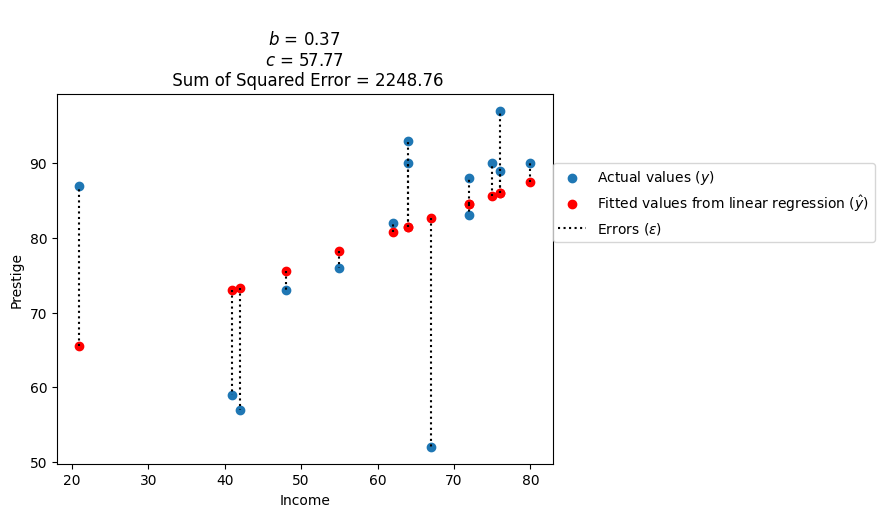

Here is the error vector for the current line: \begin{bmatrix}{} 1.23 \\ -1.48 \\ 4.41 \\ -2.17 \\ 8.49 \\ 21.44 \\ 11.49 \\ 2.55 \\ -30.63 \\ 3.52 \\ -16.35 \\ 3.03 \\ 11.03 \\ -13.98 \\ -2.58 \\ \end{bmatrix}

The sum of the squared error is <b> 2248.76. </b>

In [25]:
# show the linear regression, predicting `prestige` from `income`
errors_income = make_scatter(b = b_income,
                             c = c_income,
                             x = income,
                             xlabel = "Income",
                             with_errors = True,
                             return_errors = True,
                             show = True)

## Expanding the model - multiple predictors

So far we have fit two *separate* linear regression models.

Each separate model is shown below, in vector form, with the actual data and
error values in the relevant vectors, as well as the parameter estimates
obtained from each linear regression:

In [26]:
# do not worry about this code, it just prints the mathematical notation below this cell
jupyprint("Here is the our model (`prestige` = $b * $ `education` + $ \\text{c} + \\vec{\\varepsilon} $), showing the actual values within the `education`, `prestige` and error vectors:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = {b_education.round(2)} * {arraytex(np.atleast_2d(education).T)} + {c_education.round(2)} + {arraytex(np.atleast_2d(errors_education.round(2)).T)} $")
# do not worry about this code, it just prints the mathematical notation below this cell
jupyprint("Here is the our model (`prestige` = $b * $ `income` + $ \\text{c} + \\vec{\\varepsilon} $), showing the actual values within the `income`, `prestige` and error vectors:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = {b_income.round(2)} * {arraytex(np.atleast_2d(income).T)} + {c_income.round(2)} + {arraytex(np.atleast_2d(errors_income.round(2)).T)}$")

Here is the our model (`prestige` = $b * $ `education` + $ \text{c} + \vec{\varepsilon} $), showing the actual values within the `education`, `prestige` and error vectors:

$\begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix} = 1.01 * \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix} + -8.38 + \begin{bmatrix}{} 3.88 \\ 14.94 \\ 5.84 \\ -6.14 \\ 11.88 \\ 10.89 \\ 7.84 \\ -2.2 \\ -27.13 \\ 9.88 \\ -9.05 \\ -1.19 \\ 7.82 \\ -17.11 \\ -10.15 \\ \end{bmatrix} $

Here is the our model (`prestige` = $b * $ `income` + $ \text{c} + \vec{\varepsilon} $), showing the actual values within the `income`, `prestige` and error vectors:

$\begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix} = 0.37 * \begin{bmatrix}{} 62 \\ 72 \\ 75 \\ 55 \\ 64 \\ 21 \\ 64 \\ 80 \\ 67 \\ 72 \\ 42 \\ 76 \\ 76 \\ 41 \\ 48 \\ \end{bmatrix} + 57.77 + \begin{bmatrix}{} 1.23 \\ -1.48 \\ 4.41 \\ -2.17 \\ 8.49 \\ 21.44 \\ 11.49 \\ 2.55 \\ -30.63 \\ 3.52 \\ -16.35 \\ 3.03 \\ 11.03 \\ -13.98 \\ -2.58 \\ \end{bmatrix}$

The fitted values from each separate linear regression are shown in the output
of the cell below. You'll notice that the two models give different fitted
values. You can think of each of these regressions as modeling the linear
relationship between each predictor and the outcome variable if we **ignore**
the other predictor.

Generally, when exploring datasets and doing data science, we will be
interested in more than one predictor. We may want to **take into account**
another predictor when we get our parameter estimates.

In [27]:
jupyprint("Here are the fitted values $\hat{y}$ from the (`prestige` = $b * $ `education` + $ \\text{c} + \\vec{\\varepsilon} $) model:")
jupyprint(f"${arraytex(np.atleast_2d(b_education* education + c_education).round(2).T)} = {b_education.round(2)} * {arraytex(np.atleast_2d(education).T)} + {c_education.round(2)}$")
jupyprint("Here are the fitted values $\hat{y}$ from the (`prestige` = $b * $ `income` + $ \\text{c} + \\vec{\\varepsilon} $) model:")
jupyprint(f"${arraytex(np.atleast_2d(b_income* income + c_income).round(2).T)} = {b_income.round(2)} * {arraytex(np.atleast_2d(income).T)} + {c_income.round(2)}$")

Here are the fitted values $\hat{y}$ from the (`prestige` = $b * $ `education` + $ \text{c} + \vec{\varepsilon} $) model:

$\begin{bmatrix}{} 78.12 \\ 68.06 \\ 84.16 \\ 82.14 \\ 78.12 \\ 76.11 \\ 85.16 \\ 92.2 \\ 79.13 \\ 78.12 \\ 66.05 \\ 90.19 \\ 89.18 \\ 76.11 \\ 83.15 \\ \end{bmatrix} = 1.01 * \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix} + -8.38$

Here are the fitted values $\hat{y}$ from the (`prestige` = $b * $ `income` + $ \text{c} + \vec{\varepsilon} $) model:

$\begin{bmatrix}{} 80.77 \\ 84.48 \\ 85.59 \\ 78.17 \\ 81.51 \\ 65.56 \\ 81.51 \\ 87.45 \\ 82.63 \\ 84.48 \\ 73.35 \\ 85.97 \\ 85.97 \\ 72.98 \\ 75.58 \\ \end{bmatrix} = 0.37 * \begin{bmatrix}{} 62 \\ 72 \\ 75 \\ 55 \\ 64 \\ 21 \\ 64 \\ 80 \\ 67 \\ 72 \\ 42 \\ 76 \\ 76 \\ 41 \\ 48 \\ \end{bmatrix} + 57.77$

In most cases we will want a model where the fitted values take into account
information from *both* predictor variables.

You've already seen that it is possible to include multiple predictors in
a linear regression model on the previous [multiple regression
page](https://lisds.github.io/textbook/classification/Multiple_Regression.html). 

In fact, the original model Duncan fit included both `education` and `income`
as predictor variables - (and as mentioned previously, the parameter estimates
were calculated with a mechanical calculator, a labor which we will not subject
you to!).

**But how might we express the inclusion of multiple predictors in the
mathematical notation that we've already seen for linear regression models?**

You can think of it this way, we want to include a second predictor variable in
our model. One way of saying this is that we are including a second predictor
*vector* in our model. So we need to include a second predictor vector in the
mathematical notation.

Remember the meaning of the slope? It relates the predictor variable to the
outcome variable by describing how the outcome variable changes as the
predictor variable scores change (where "change" refers to a comparison of the
predictor variable and outcome variable scores of different observational
units).

Therefore, if we include a second predictor vector, we will also want a second
slope in the model. So if our original single-predictor model was:

`prestige` = $b * $ `education` + $ \text{c} + \vec{\varepsilon} $

If we want to include `income` as a second predictor in the model, we could write this as:

`prestige` =  $b_1 * $ `education` + $b_2 * $ `income` + $ \text{c} + \vec{\varepsilon} $

You'll notice there are now two slopes $b_1$ and $b_2$. 

* $b_1$ relates changes in `education` to changes in `prestige`.
* $b_2$ relates changes in `income` to changes in `prestige`.

We keep the form of the relationship between each slope and each predictor the
same (e.g. the predictor vector gets multiplied by the slope for that
predictor) in order that the model is still a *linear* regression - if we
changed the form of the slope/predictor relationship, say, by raising the slope
to the power of the predictor values, then the model would be nonlinear.

We have only one intercept term for reasons we will explain later (for now you
can just think of the intercept as allowing us to be more flexible in the model
we fit, allowing us to fit it better to a wider variety of datasets).

Remember that our predictor vector `education` can also be referred to by its
mathematical name $\vec{x}$? We might want to use different symbols to refer to
our second slope and second predictor, so we could write something like:

$
\vec{y} = b_1 \vec{x} + b_2 \vec{w} + c + \vec{\varepsilon}
$

Where in our case:

* $\vec{y}$ would be our `prestige` vector (e.g. our *outcome* variable).
* $\vec{x}$ would be our `education` vector (e.g. our *first* predictor
  variable - the slope for this predictor is $b_1$).
* $\vec{w}$ would be our `income` vector (e.g. our  *second* predictor variable
  — the slope for this predictor is $b_2$).

However, if we include extra predictors (three, or four, or five...) then we
will have to use new symbols for each one, which will get cumbersome.

Instead we add a subscript to the mathematical notation for each predictor
variable, like this:

$ \vec{x_1} = \vec{x} = $ `education`

$ \vec{x_2} = \vec{w} = $ `income`

We can then refer to each predictor vector as "the $x$ *one* vector" for
$\vec{x_1}$ and the "the $x$ *two* vector" for $\vec{x_2}$.

**If we had additional predictor variables (e.g. more than two) we can extend
this notation to as many variables as we like, $\vec{x_3}$ for the third
predictor variable, $\vec{x_4}$ for the fourth predictor variable and so
on...**

We can refer to each of the values within each vector using this notation:

`education` = $ \vec{x_1} = \begin{bmatrix}{} x_{1_1}, \\ x_{1_2} \\ ... \\ x_{1_n}\end{bmatrix} $

`income` = $\vec{x_2} = \begin{bmatrix}{} x_{2_1}, \\ x_{2_2} \\ ... \\ x_{2_n}\end{bmatrix}$

So each $x$ value now has a number indicating which predictor vector it is part
of (e.g. $x_{1}$ or $x_{2}$), and then has a second subscript indicating it's
index location within each vector. So:

* $x_{1_1}$ is the *first* value from $\vec{x_1}$
* $x_{1_2}$ is the *second* value from $\vec{x_1}$
* $x_{1_3}$ is the *third* value from $\vec{x_1}$
* ...
* $x_{1_{13}}$ is the *thirteenth* value from $\vec{x_1}$
* $x_{1_{14}}$ is the *fourteenth* value from $\vec{x_1}$
* $x_{1_{15}}$ is the *fifteenth* value from $\vec{x_1}$

And:

* $x_{2_1}$ is the *first* value from $\vec{x_2}$
* $x_{2_2}$ is the *second* value from $\vec{x_2}$
* $x_{2_3}$ is the *third* value from $\vec{x_2}$
* ...
* $x_{2_{13}}$ is the *thirteenth* value from $\vec{x_2}$
* $x_{2_{14}}$ is the *fourteenth* value from $\vec{x_2}$
* $x_{2_{15}}$ is the *fifteenth* value from $\vec{x_2}$

Remember the advantage of mathematical notation like this is that it's general.
It can be used to refer to datasets with more than 15 observations. You'll
remember that `n` represents the total number of values within each vector, in
our case $n = 15$, as there are 15 observations. So we can also write the final
value in each vector as:

* $\Large x_{1_n}$ is the *final* value from $ \Large \vec{x_1}$, which in this case has 15 values, so can also be written as $ \Large x_{1_{15}}$

Now we can refer to our `education` as our $x_1$ vector and `income` as our
$x_2$ vector, the whole model, with both predictors, in mathematical notations
is:

$ \vec{y} = b_1 \vec{x_1} + b_2 \vec{x_2} + \text{c} + \vec{\varepsilon} $

We can write this using the Python names for the vectors we are using:

`prestige` =  $b_1 * $ `education` + $b_2 * $ `income` + $ \text{c} + \vec{\varepsilon} $

And here is the mathematical form, showing the mathematical notation for the
values in each vector:

$\begin{bmatrix}{} \text{$y_{1}$} \\ \text{$y_{2}$} \\ \text{$y_{3}$} \\ \text{$y_{4}$} \\ \text{$y_{5}$} \\ \text{$y_{6}$} \\ \text{$y_{7}$} \\ \text{$y_{8}$} \\ \text{$y_{9}$} \\ \text{$y_{10}$} \\ \text{$y_{11}$} \\ \text{$y_{12}$} \\ \text{$y_{13}$} \\ \text{$y_{14}$} \\ \text{$y_{15}$} \\ \end{bmatrix} = b_1 * \begin{bmatrix}{} \text{$x_{1_1}$} \\ \text{$x_{1_2}$} \\ \text{$x_{1_3}$} \\ \text{$x_{1_4}$} \\ \text{$x_{1_5}$} \\ \text{$x_{1_6}$} \\ \text{$x_{1_7}$} \\ \text{$x_{1_8}$} \\ \text{$x_{1_9}$} \\ \text{$x_{1_{10}}$} \\ \text{$x_{1_{11}}$} \\ \text{$x_{1_{12}}$} \\ \text{$x_{1_{13}}$} \\ \text{$x_{1_{14}}$} \\ \text{$x_{1_{15}}$} \\ \end{bmatrix} + b_2 *  \begin{bmatrix}{} \text{$x_{2_{1}}$} \\ \text{$x_{2_{2}}$} \\ \text{$x_{2_{3}}$} \\ \text{$x_{2_{4}}$} \\ \text{$x_{2_{5}}$} \\ \text{$x_{2_{6}}$} \\ \text{$x_{2_{7}}$} \\ \text{$x_{2_{8}}$} \\ \text{$x_{2_{9}}$} \\ \text{$x_{2_{10}}$} \\ \text{$x_{2_{11}}$} \\ \text{$x_{2_{12}}$} \\ \text{$x_{2_{13}}$} \\ \text{$x_{2_{14}}$} \\ \text{$x_{2_{15}}$} \\ \end{bmatrix}  +c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

The code cell below "fills in" the notation with the actual values from our
vectors:

In [28]:
# Do not worry about this code, it just prints the mathematical notation below
# this cell.
jupyprint("Here is the our model (`prestige` =  $b_1 * $ `education` + $b_2 * $ `income` + $ \\text{c} + \\vec{\\varepsilon}$), showing the actual values within the `education`, `income` and `prestige` vectors:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = b_1 * {arraytex(np.atleast_2d(education).T)} + b_2 * {arraytex(np.atleast_2d(income).T)} + c +" +" \\begin{bmatrix}{} \\text{$\\varepsilon_{1}$} \\\\ \\text{$\\varepsilon_{2}$} \\\\ \\text{$\\varepsilon_{3}$} \\\\ \\text{$\\varepsilon_{4}$} \\\\ \\text{$\\varepsilon_{5}$} \\\\ \\text{$\\varepsilon_{6}$} \\\\ \\text{$\\varepsilon_{7}$} \\\\ \\text{$\\varepsilon_{8}$} \\\\ \\text{$\\varepsilon_{9}$} \\\\ \\text{$\\varepsilon_{10}$} \\\\ \\text{$\\varepsilon_{11}$} \\\\ \\text{$\\varepsilon_{12}$} \\\\ \\text{$\\varepsilon_{13}$} \\\\ \\text{$\\varepsilon_{14}$} \\\\ \\text{$\\varepsilon_{15}$} \\\\ \\end{bmatrix}$")

Here is the our model (`prestige` =  $b_1 * $ `education` + $b_2 * $ `income` + $ \text{c} + \vec{\varepsilon}$), showing the actual values within the `education`, `income` and `prestige` vectors:

$\begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix} = b_1 * \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix} + b_2 * \begin{bmatrix}{} 62 \\ 72 \\ 75 \\ 55 \\ 64 \\ 21 \\ 64 \\ 80 \\ 67 \\ 72 \\ 42 \\ 76 \\ 76 \\ 41 \\ 48 \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

Let's look at our vectors individually, to compare them to the notation:

In [29]:
# prestige
prestige

array([82, 83, 90, 76, 90, 87, 93, 90, 52, 88, 57, 89, 97, 59, 73])

In [30]:
# education
education

array([ 86,  76,  92,  90,  86,  84,  93, 100,  87,  86,  74,  98,  97,
        84,  91])

In [31]:
# income
income

array([62, 72, 75, 55, 64, 21, 64, 80, 67, 72, 42, 76, 76, 41, 48])

### We will now pause for an exercise...


## Multiple linear regression using arbitrary guesses

Now we are armed with the notation for linear regression models which include
multiples predictors, let's look at the mechanics of fitting such models.

Essentially, we now need to modify our cost function to accept two slopes and
an extra predictor vector, as per the new model specification. Let's quickly
recap the new model, with multiple predictors:

`prestige` = $b_1 * $ `education` + $b_2 * $ `income` +  $ \text{c} + \vec{\varepsilon} $

Which we can write in mathematical notation as:

$ \vec{y} = b_1 \vec{x_1} + b_2 \vec{x_2} + \text{c} + \vec{\varepsilon} $

- $\vec{x_1}$ is the `education` vector.
- $\vec{x_2}$ is the `income` vector.
- $b_1$ is the slope for `education`.
- $b_2$ is the slope for `income`.
- $c$ is the intercept (again, including this lets us fit our model more
  flexibly, just as when we use a single predictor).
- $\vec{\varepsilon}$ is the error vector.

You'll notice that there is still **only one error vector** despite there now
being two slopes. This is a key concept to appreciate, when we include extra
predictors in the model.

Recall that the procedure for fitting a linear regression with a single
predictor variable is:

- we write a cost function which takes a value of $b$ and $c$, and returns
  a "cost" - e.g. a single value summary of how well the fitted values from
  that value of $b$ and $c$ fit the data we have. 
- Specifically, in our case, the cost function generates fitted values
  ($\hat{y}$), using $b$ and $c$, and then subtracts these from our actual $y$
  values, to give us the error vector $\vec{\varepsilon}$. The values
  $\vec{\varepsilon}$ and then squared and added together, to give us the sum
  of the squared error. Our cost function is shown below:

In [32]:
def ss_any_line(b_and_c, x_vector, y_vector):
    """ Sum of squares error for slope, intercept
    """
    # unpack the list containing the slope and the intercept
    b, c = b_and_c

    # calculate the fitted values, for this slope/intercept pairing
    fitted = b*x_vector + c

    # calculate the error vector
    error = y_vector - fitted

    # return the value of the cost function
    return np.sum(error ** 2)

- We then pass our cost function to `minimize` and it tries multiple $b$ and $c$
  pairs until it finds the pair that gives the lowest value of the cost
  function (e.g. the lowest sum of the squared error), out of all possible $b$
  and $c$ pairs.

How do we include an extra predictor variable in this process? - *we include it
in the computation of the fitted values*. When we have two predictors, we
calculate our fitted values $\hat{y}$ as follows:

$\vec{\hat{y}} = b_1 \vec{x_1} + b_2 \vec{x_2} + \text{c} $

Or, showing the mathematical notation for the values within the vectors:

$\begin{bmatrix}{} \text{$\hat{y_{1}}$} \\ \text{$\hat{y_{2}}$} \\ \text{$\hat{y_{3}}$} \\ \text{$\hat{y_{4}}$} \\ \text{$\hat{y_{5}}$} \\ \text{$\hat{y_{6}}$} \\ \text{$\hat{y_{7}}$} \\ \text{$\hat{y_{8}}$} \\ \text{$\hat{y_{9}}$} \\ \text{$\hat{y_{10}}$} \\ \text{$\hat{y_{11}}$} \\ \text{$\hat{y_{12}}$} \\ \text{$\hat{y_{13}}$} \\ \text{$\hat{y_{14}}$} \\ \text{$\hat{y_{15}}$} \\ \end{bmatrix} = b_1 * \begin{bmatrix}{} \text{$x_{1_1}$} \\ \text{$x_{1_2}$} \\ \text{$x_{1_3}$} \\ \text{$x_{1_4}$} \\ \text{$x_{1_5}$} \\ \text{$x_{1_6}$} \\ \text{$x_{1_7}$} \\ \text{$x_{1_8}$} \\ \text{$x_{1_9}$} \\ \text{$x_{1_{10}}$} \\ \text{$x_{1_{11}}$} \\ \text{$x_{1_{12}}$} \\ \text{$x_{1_{13}}$} \\ \text{$x_{1_{14}}$} \\ \text{$x_{1_{15}}$} \\ \end{bmatrix} + b_2 *  \begin{bmatrix}{} \text{$x_{2_{1}}$} \\ \text{$x_{2_{2}}$} \\ \text{$x_{2_{3}}$} \\ \text{$x_{2_{4}}$} \\ \text{$x_{2_{5}}$} \\ \text{$x_{2_{6}}$} \\ \text{$x_{2_{7}}$} \\ \text{$x_{2_{8}}$} \\ \text{$x_{2_{9}}$} \\ \text{$x_{2_{10}}$} \\ \text{$x_{2_{11}}$} \\ \text{$x_{2_{12}}$} \\ \text{$x_{2_{13}}$} \\ \text{$x_{2_{14}}$} \\ \text{$x_{2_{15}}$} \\ \end{bmatrix}  +c $

You'll note that,  despite there now being two predictors and two slopes, *we
still only get one set of fitted values*. That is what makes this a *multiple
regression model* rather than two separate linear regressions. We performed two
separate linear regressions near the start of this page, and they produced
*two* separate vectors of fitted values, and *two* separate error vectors.

Because the multiple predictor model takes into account **both** predictors
when finding its parameter estimates, for any set of parameter estimates ($b_1,
b_1, c $) we only get one vector of fitted values, and therefore we also have
only one vector of error values (in the error vector $\vec{\varepsilon}$).

**We square the values in $\vec{\varepsilon}$ and add them up to get our sum of
squared error, for a specific combination of parameter estimates ($b_1, b_1,
c $)**.

We then use `minimize` to search for the combination of parameter estimates
($b_1, b_1, c $) which give the lowest sum of the squared error, out of all
possible combinations.

This is exactly the same process as for a single predictor model - *only now
the fitted values are generated using information from two predictor
variables*.

For instance, let's say we take a completely arbitrary guess at the combination
of parameter estimates, to see how the fitted values and error vector are
generated, using two predictor variables:

In [33]:
# Arbitrary guesses for the slopes and intercept.
education_slope_guess = 1
income_slope_guess = 1
intercept_guess = 1

With our guessed parameter estimates, the model with two predictors could be
written as follows:

In [34]:
# Do not worry about this code, it just prints the mathematical notation below
# this cell.
jupyprint("Here is the our model ($ \\vec{y} = b_1 \\vec{x_1} + b_2 \\vec{x_2} + \\text{c} + \\vec{\\varepsilon} $), showing the actual values within the `education`, `income` and `prestige` vectors:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = {education_slope_guess} * {arraytex(np.atleast_2d(education).T)} + {income_slope_guess} * {arraytex(np.atleast_2d(income).T)} + {intercept_guess} +" +" \\begin{bmatrix}{} \\text{$\\varepsilon_{1}$} \\\\ \\text{$\\varepsilon_{2}$} \\\\ \\text{$\\varepsilon_{3}$} \\\\ \\text{$\\varepsilon_{4}$} \\\\ \\text{$\\varepsilon_{5}$} \\\\ \\text{$\\varepsilon_{6}$} \\\\ \\text{$\\varepsilon_{7}$} \\\\ \\text{$\\varepsilon_{8}$} \\\\ \\text{$\\varepsilon_{9}$} \\\\ \\text{$\\varepsilon_{10}$} \\\\ \\text{$\\varepsilon_{11}$} \\\\ \\text{$\\varepsilon_{12}$} \\\\ \\text{$\\varepsilon_{13}$} \\\\ \\text{$\\varepsilon_{14}$} \\\\ \\text{$\\varepsilon_{15}$} \\\\ \\end{bmatrix}$")

Here is the our model ($ \vec{y} = b_1 \vec{x_1} + b_2 \vec{x_2} + \text{c} + \vec{\varepsilon} $), showing the actual values within the `education`, `income` and `prestige` vectors:

$\begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix} = 1 * \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix} + 1 * \begin{bmatrix}{} 62 \\ 72 \\ 75 \\ 55 \\ 64 \\ 21 \\ 64 \\ 80 \\ 67 \\ 72 \\ 42 \\ 76 \\ 76 \\ 41 \\ 48 \\ \end{bmatrix} + 1 + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

Remember the formula for the fitted values with a single predictor?:

$\vec{\hat{y}} = b \vec{x} + \text{c}$

As mentioned above, just as the formula for the model, this can be modified for two predictors:

$\vec{\hat{y}} = b_1 \vec{x_1} +  b_2\vec{x_2} + \text{c}$

In our case this is:

$\vec{\hat{y}} = b_1 * $ `education` + $b_2 * $ `income` +   $\text{c} $

Let's calculate the fitted values for the slopes and intercepts we just
guessed:

In [35]:
# Calculate the fitted values.
fitted = education_slope_guess * education + income_slope_guess * income + intercept_guess
fitted

array([149, 149, 168, 146, 151, 106, 158, 181, 155, 159, 117, 175, 174,
       126, 140])

The cell below prints out the process of computing the fitted values, using two
predictors, in vector form.

It first shows the model, and then shows the values within the vectors in the
model.

In [36]:
# do not worry about this code, it just prints the mathematical notation below this cell
jupyprint("$\\vec{\\hat{y}} = b_1 * $ `education` + $b_2 * $ `income` +   $\\text{c} $")
jupyprint(f"${arraytex(np.atleast_2d(fitted).T)} = {education_slope_guess} * {arraytex(np.atleast_2d(education).T)} + {income_slope_guess} * {arraytex(np.atleast_2d(income).T)} + {intercept_guess}$")

$\vec{\hat{y}} = b_1 * $ `education` + $b_2 * $ `income` +   $\text{c} $

$\begin{bmatrix}{} 149 \\ 149 \\ 168 \\ 146 \\ 151 \\ 106 \\ 158 \\ 181 \\ 155 \\ 159 \\ 117 \\ 175 \\ 174 \\ 126 \\ 140 \\ \end{bmatrix} = 1 * \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix} + 1 * \begin{bmatrix}{} 62 \\ 72 \\ 75 \\ 55 \\ 64 \\ 21 \\ 64 \\ 80 \\ 67 \\ 72 \\ 42 \\ 76 \\ 76 \\ 41 \\ 48 \\ \end{bmatrix} + 1$

Remember that we get our error vector ($\vec{\varepsilon}$) by subtracting our
fitted values ($\hat{y}$) from the values of our actual outcome variable:

$$
\vec{\varepsilon} = \begin{bmatrix}
    y_1 - \hat{y}_1 \\
    y_2 - \hat{y}_2 \\
    \vdots \\
    y_n - \hat{y}_n
\end{bmatrix}
$$

This is performed in the cell below, using the fitted models based on our
guessed parameter estimates. We reiterate again that these fitted values are
now generated using *two predictor vectors and two slopes*.

In [37]:
# Calculate the error vector, for our guessed parameter estimates.
errors = prestige - fitted
errors

array([ -67,  -66,  -78,  -70,  -61,  -19,  -65,  -91, -103,  -71,  -60,
        -86,  -77,  -67,  -67])

The output of the cell below shows the vectors in the model, and now also shows
the error vector, along with our guessed parameter estimates.

In [38]:
# Do not worry about this code, it just prints the mathematical notation below
# this cell.
jupyprint(f"${arraytex(np.atleast_2d(fitted + errors).T)} = {education_slope_guess} * {arraytex(np.atleast_2d(education).T)} + {income_slope_guess} * {arraytex(np.atleast_2d(income).T)} + {intercept_guess} + {arraytex(np.atleast_2d(errors).T)}$")

$\begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix} = 1 * \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix} + 1 * \begin{bmatrix}{} 62 \\ 72 \\ 75 \\ 55 \\ 64 \\ 21 \\ 64 \\ 80 \\ 67 \\ 72 \\ 42 \\ 76 \\ 76 \\ 41 \\ 48 \\ \end{bmatrix} + 1 + \begin{bmatrix}{} -67 \\ -66 \\ -78 \\ -70 \\ -61 \\ -19 \\ -65 \\ -91 \\ -103 \\ -71 \\ -60 \\ -86 \\ -77 \\ -67 \\ -67 \\ \end{bmatrix}$

We can then square the values in this error vector, and add them up. This gives
us the sum of the squared error for our particular combination of slopes and
intercepts ($b_1, b_1, c $) which we arbitrarily guessed.

In [39]:
# Calculate the sum of squared error, from our error vector.
np.sum(errors**2)

77970

The code cell below lets us make different guesses about the parameter
estimates (the slopes and intercepts $b_1, b_1, c $) and shows us the error
vector and the sum of the squared error, for that particular combination.

If you are using this page interactively, try using the sliders below to change
the parameter estimates, and see how this changes the error vector, and the
resultant sum of the squared error:

- The first slider controls the $x_1$ (`education`) slope ($b_1$).
- The second slider controls the $x_2$ (`income`) slope ($b_1$).
- The third slider controls the intercept.

*Note*: it's best to change these parameters "slowly" e.g. take a deep note of
how the vectors look with a certain parameter combination, and what the sum of
the squared error is for that combination. Then change one parameter and see
how it affects the error vector.

In [40]:
def interactive_notation(edu_slope_guess=1,
                         inc_slope_guess=1,
                         intercept_guess=1):

    # calculate the fitted values, for this combination of parameter estimates
    fitted = edu_slope_guess * education + inc_slope_guess * income + intercept_guess

    # calculate the errors, for this combination of parameter estimates
    errors = prestige - fitted

    # do not worry about this code, it just prints the mathematical notation below this cell
    jupyprint("$\\vec{\\hat{y}} = b_1 * $ `education` + $b_2 * $ `income` +   $\\text{c} $")
    jupyprint(f"${arraytex(np.atleast_2d(fitted + errors).astype(int).T)} = {round(edu_slope_guess, 2)} * {arraytex(np.atleast_2d(education).T)} + {round(inc_slope_guess, 2)} * {arraytex(np.atleast_2d(income).T)} + {round(intercept_guess, 2)} + {arraytex(np.atleast_2d(errors).round(2).T)}$")
    jupyprint(f"The sum of the squared errors for this combination of parameter estimates is <b> {round(np.sum(errors**2), 2)} </b>")

interact(interactive_notation, edu_slope_guess = (-1, 1, 0.1), inc_slope_guess = (-1, 1, 0.1), intercept_guess = (-10, 10, 0.1))

interactive(children=(FloatSlider(value=1.0, description='edu_slope_guess', max=1.0, min=-1.0), FloatSlider(va…

<function __main__.interactive_notation(edu_slope_guess=1, inc_slope_guess=1, intercept_guess=1)>

To recap:

- we are now using two predictor variables and two slopes to generate our
  fitted values.
- *Everything else in the fitting process is the same as for a single predictor model.*

The value of the sum of the squared error depends on our particular combination
of parameter estimates ($b_1, b_2, c $). We can use `minimize` to try lots of
combinations (many triplets) in order to identify the combination which gives
the smallest sum of the squared error.

In order to do that, we need to modify our cost function so that it accepts two
predictors, and generates fitted values which result from those:

- two predictors,
- two corresponding slopes and
- an intercept.

In [41]:
# modify our sum of squares function to accept two predictors
# The cost function now takes an extra predictor vector.
def ss_two_predictors(bs_and_c, x1_vector, x2_vector, y_vector):
    """ Sum of squares error for intercept and a pair of slopes.
    """
    # unpack the list containing the slope and the intercept (this now has an extra slope!)
    b_1, b_2, c = bs_and_c 
    
    # calculate the fitted values, for this slope/intercept pairing (this now has an extra slope and extra vector!)
    fitted_vector = b_1*x1_vector + b_2*x2_vector + c 
    
    # calculate the error vector (this is the same process as for a single predictor)
    error = y_vector - fitted_vector
    
    # return the value of the cost function (this is the same process as for a single predictor)
    return np.sum(error ** 2)

Let's test our function out, with the last set of guessed parameters we used:

In [42]:
# test our function, with our guessed parameter estimates
ss_two_predictors([education_slope_guess, income_slope_guess, intercept_guess],
                  x1_vector=education,
                  x2_vector=income,
                  y_vector=prestige)

77970

# Multiple linear regression using minimize

Once we have modified our cost function, we can pass it to `minimize` in exactly the same way as with a single predictor model.

Only now we need to supply it with an extra slope in the list of initial parameter estimates, and an extra predictor vector in the `args = ` argument (e.g. we now use `args=(education, income, prestige)` rather than just `args=(education, prestige)`.

In [43]:
min_ss_two_predictor = minimize(ss_two_predictors,# the function we are minimizing
                               [intercept_guess, education_slope_guess, income_slope_guess], # a list of initial guesses for the parameters
                               args=(education, income, prestige)) # other arguments to give to the `minimize` function

min_ss_two_predictor

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1900.6913636271915
        x: [ 7.836e-01  1.947e-01 -6.401e-01]
      nit: 10
      jac: [ 0.000e+00 -3.052e-05  0.000e+00]
 hess_inv: [[ 9.526e-05 -1.182e-04 -8.007e-04]
            [-1.182e-04  1.657e-04  2.858e-04]
            [-8.007e-04  2.858e-04  5.388e-02]]
     nfev: 220
     njev: 52

We can view our parameter estimates just as before, only now you will see that there are three of them (because of the extra slope $b_2$).

In [44]:
# pull out our parameter estimates
min_ss_two_predictor.x

array([ 0.78357 ,  0.194706, -0.640123])

We can save them as separate python variables, just as before:

In [45]:
# save our parameter estimates from minimize
education_slope_two_predictor = min_ss_two_predictor.x[0]

income_slope_two_predictor = min_ss_two_predictor.x[1]

intercept_two_predictor = min_ss_two_predictor.x[2]

In [46]:
# show the value of the sum of squared error, for the combination of parameters
# which gives the lowest sum of squared error,
min_ss_two_predictor.fun

1900.6913636271915

Let's compare this to the sum of squared error from the last set of guessed parameter estimates that we used:

In [47]:
# compare that to the sum of squared errors from our guessed values
ss_two_predictors([intercept_guess, education_slope_guess, income_slope_guess],
                  x1_vector=education, x2_vector=income, y_vector=prestige)

77970

We can see that minimize found a much better fitting model!

So, just to recap:

We added an extra predictor into our model:

`prestige` = $b_1 * $ `education` + $b_2 * $ `income` +  $ \text{c} + \vec{\varepsilon} $

The mathematical notation for this is:

$ \vec{y} = b_1 \vec{x_1} + b_2 \vec{x_2} + \text{c} + \vec{\varepsilon} $

$\begin{bmatrix}{} \text{$y_{1}$} \\ \text{$y_{2}$} \\ \text{$y_{3}$} \\ \text{$y_{4}$} \\ \text{$y_{5}$} \\ \text{$y_{6}$} \\ \text{$y_{7}$} \\ \text{$y_{8}$} \\ \text{$y_{9}$} \\ \text{$y_{10}$} \\ \text{$y_{11}$} \\ \text{$y_{12}$} \\ \text{$y_{13}$} \\ \text{$y_{14}$} \\ \text{$y_{15}$} \\ \end{bmatrix} = b_1 * \begin{bmatrix}{} \text{$x_{1_1}$} \\ \text{$x_{1_2}$} \\ \text{$x_{1_3}$} \\ \text{$x_{1_4}$} \\ \text{$x_{1_5}$} \\ \text{$x_{1_6}$} \\ \text{$x_{1_7}$} \\ \text{$x_{1_8}$} \\ \text{$x_{1_9}$} \\ \text{$x_{1_{10}}$} \\ \text{$x_{1_{11}}$} \\ \text{$x_{1_{12}}$} \\ \text{$x_{1_{13}}$} \\ \text{$x_{1_{14}}$} \\ \text{$x_{1_{15}}$} \\ \end{bmatrix} + b_2 *  \begin{bmatrix}{} \text{$x_{2_{1}}$} \\ \text{$x_{2_{2}}$} \\ \text{$x_{2_{3}}$} \\ \text{$x_{2_{4}}$} \\ \text{$x_{2_{5}}$} \\ \text{$x_{2_{6}}$} \\ \text{$x_{2_{7}}$} \\ \text{$x_{2_{8}}$} \\ \text{$x_{2_{9}}$} \\ \text{$x_{2_{10}}$} \\ \text{$x_{2_{11}}$} \\ \text{$x_{2_{12}}$} \\ \text{$x_{2_{13}}$} \\ \text{$x_{2_{14}}$} \\ \text{$x_{2_{15}}$} \\ \end{bmatrix}  +c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

We modified our cost function so that it uses fitted values ($\hat{y}$) which are generated using two slopes and two predictor variables:

$\vec{\hat{y}} = b_1 * $ `education` + $b_2 * $ `income` +   $\text{c} $

Which can be shown with the mathematical notation for the individual values within the vectors:

$\begin{bmatrix}{} \text{$\hat{y_{1}}$} \\ \text{$\hat{y_{2}}$} \\ \text{$\hat{y_{3}}$} \\ \text{$\hat{y_{4}}$} \\ \text{$\hat{y_{5}}$} \\ \text{$\hat{y_{6}}$} \\ \text{$\hat{y_{7}}$} \\ \text{$\hat{y_{8}}$} \\ \text{$\hat{y_{9}}$} \\ \text{$\hat{y_{10}}$} \\ \text{$\hat{y_{11}}$} \\ \text{$\hat{y_{12}}$} \\ \text{$\hat{y_{13}}$} \\ \text{$\hat{y_{14}}$} \\ \text{$\hat{y_{15}}$} \\ \end{bmatrix} = b_1 * \begin{bmatrix}{} \text{$x_{1_1}$} \\ \text{$x_{1_2}$} \\ \text{$x_{1_3}$} \\ \text{$x_{1_4}$} \\ \text{$x_{1_5}$} \\ \text{$x_{1_6}$} \\ \text{$x_{1_7}$} \\ \text{$x_{1_8}$} \\ \text{$x_{1_9}$} \\ \text{$x_{1_{10}}$} \\ \text{$x_{1_{11}}$} \\ \text{$x_{1_{12}}$} \\ \text{$x_{1_{13}}$} \\ \text{$x_{1_{14}}$} \\ \text{$x_{1_{15}}$} \\ \end{bmatrix} + b_2 *  \begin{bmatrix}{} \text{$x_{2_{1}}$} \\ \text{$x_{2_{2}}$} \\ \text{$x_{2_{3}}$} \\ \text{$x_{2_{4}}$} \\ \text{$x_{2_{5}}$} \\ \text{$x_{2_{6}}$} \\ \text{$x_{2_{7}}$} \\ \text{$x_{2_{8}}$} \\ \text{$x_{2_{9}}$} \\ \text{$x_{2_{10}}$} \\ \text{$x_{2_{11}}$} \\ \text{$x_{2_{12}}$} \\ \text{$x_{2_{13}}$} \\ \text{$x_{2_{14}}$} \\ \text{$x_{2_{15}}$} \\ \end{bmatrix}  +c $

We then used `minimize` to find the combination of slopes and intercepts ($b_1, b_2, c$) which gives the lowest sum of the squared error, out of any combination.

The model is shown below, with the best-fitting parameter estimates ($b_1, b_2, c$), as well as the `prestige`, `education` and `income` vectors, and the error vector $\vec{\varepsilon}$.

In [48]:
# do not worry about this code, it just prints the mathematical notation below this cell
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = {round(education_slope_two_predictor, 2)} * {arraytex(np.atleast_2d(education).T)} + {round(income_slope_two_predictor,2)} * {arraytex(np.atleast_2d(income).T)} + {round(intercept_two_predictor, 2)} + {arraytex(np.atleast_2d((prestige - (education_slope_two_predictor*education + income_slope_two_predictor*income + intercept_two_predictor)).round(2)).T)}$")

$\begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix} = 0.78 * \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix} + 0.19 * \begin{bmatrix}{} 62 \\ 72 \\ 75 \\ 55 \\ 64 \\ 21 \\ 64 \\ 80 \\ 67 \\ 72 \\ 42 \\ 76 \\ 76 \\ 41 \\ 48 \\ \end{bmatrix} + -0.64 + \begin{bmatrix}{} 3.18 \\ 10.07 \\ 3.95 \\ -4.59 \\ 10.79 \\ 17.73 \\ 8.31 \\ -3.29 \\ -28.58 \\ 7.23 \\ -8.52 \\ -1.95 \\ 6.84 \\ -14.16 \\ -7.01 \\ \end{bmatrix}$

In [49]:
# just for comparison
df[['prestige', 'education', 'income']]

,prestige,education,income
0,82,86,62
1,83,76,72
2,90,92,75
3,76,90,55
4,90,86,64
5,87,84,21
6,93,93,64
7,90,100,80
8,52,87,67
9,88,86,72


# Lines in 3D? WTF? 

*Note*: (WTF? = What To Fit?)

When we fit a linear regression with *one* predictor variable, we used `minimize` to find the line of best fit.

Now we have *two* predictors, are we still fitting a line?

When using one predictor, we used `plt.scatter` to create a scatterplot to show the data.

Now we have two predictors, we will need a 3D scatterplot (do not worry about the specifics of how to generate this plot, it is just to visualise what is happening when we fit our model):

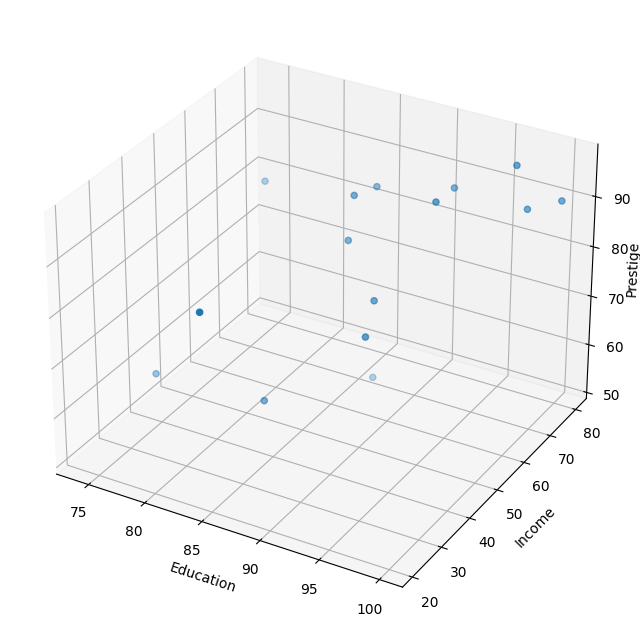

In [50]:
# do not worry about the details of this code, it just generates the 3D scatter plot
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(education, income, prestige)
ax.set_xlabel('Education')
ax.set_ylabel('Income')
ax.set_zlabel('Prestige')
ax.zaxis.labelpad=-3
plt.show()

Each datapoint (in blue) on the scatterplot is one observational unit (in this case an occupation). The location on the `education` axis of each point is given by that occupation's `education` score. The location on the `income` axis of each point is given by that occupation's `income` score. The location on the `prestige` axis is given by that occupation's `prestige` score.

Let's look at the formula for the fitted values, with two predictors:

$\vec{\hat{y}} = b_1 * $ `education` + $b_2 * $ `income` +   $\text{c} $

This equation let's us generate a fitted value for each observational unit. The fitted value for a specific observational unit is generated by the `education` score and `income` score of that observational unit, as well as the parameter estimates $b_1, b_2$ and $c$.

But remember that the foundational purposes of regression models are *description* and *prediction*? If we were to use our model to make predictions about new, unseen data from the same underlying population, then we might get an observational unit with a new pairing of `education` and `income` scores (for instance, scoring 100 on each).

As you look at the 3D scatterplot, imagine it as a physical object. As if you're literally viewing the points floating in sapce. A specific pairing of an `education` score and `income` score can occur at any point on the "floor" of the scatterplot e.g at any point in the square "floor" of the graph. 

Fortunately, once we have our parameter estimates $b_1, b_2$ and $c$ we can generate fitted values for **any** `education` and `income` score pairing. 

This means that we are fitting a *plane of best fit* rather than a *line of best fit*. 

This is easier to appreciate graphically.

The output of the cell below shows the *plane of best fit*, obtained using `minimize`:

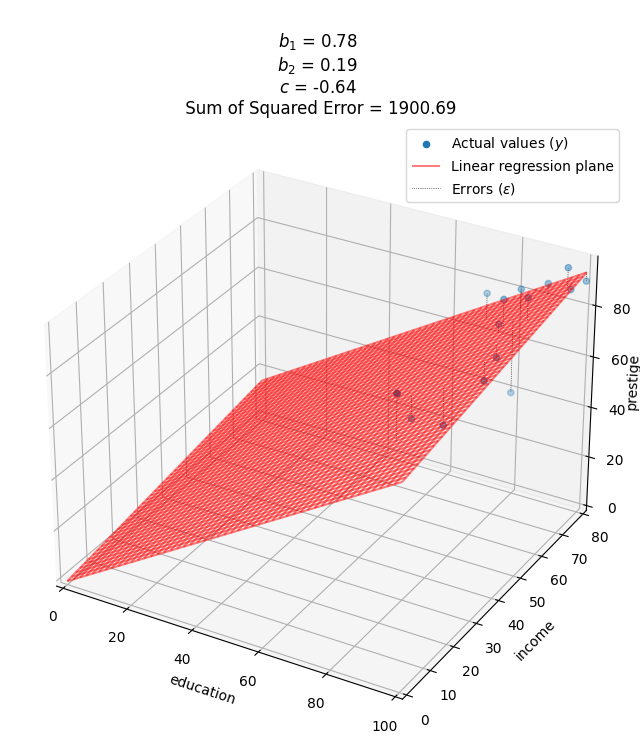

Here is the error vector for the current regression plane: \begin{bmatrix}{} 3.18 \\ 10.07 \\ 3.95 \\ -4.59 \\ 10.79 \\ 17.73 \\ 8.31 \\ -3.29 \\ -28.58 \\ 7.23 \\ -8.52 \\ -1.95 \\ 6.84 \\ -14.16 \\ -7.01 \\ \end{bmatrix}

The sum of the squared error is <b> 1900.69 </b>.

In [51]:
# do not worry about this code, iit is just to generate the 3D plots
def make_3d_scatter(x1, x2, y,
                    x1_slope = b_education,
                    x2_slope = b_income,
                    c =  c_income, 
                   x1_label = 'education',
                   x2_label = 'income',
                   y_label = 'prestige',
                   return_errors = False,
                   show = True,
                   plane_alpha = 0.5):
    sum_sq = ss_two_predictors([x1_slope, x2_slope, c], x1, x2, y)
    ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
    ax.scatter(x1,x2,y, label = 'Actual values ($y$)')
    ax.set_xlabel(x1_label)
    ax.set_ylabel(x2_label)
    ax.set_zlabel(y_label)
    mx_x1 = x1.max()
    mx_x2 = x2.max()
    mx_y = y.max()
    # Plot the fitting plane.
    plane_x = np.linspace(0, mx_x1, 50)
    plane_y = np.linspace(0, mx_x2, 50)
    X, Y = np.meshgrid(plane_x, plane_y)
    Z = c + x1_slope * X + x2_slope * Y
    ax.plot_wireframe(X,Y,Z, color = 'red', label = 'Linear regression plane', alpha = plane_alpha)
    # Plot lines between each point and fitting plane
    for i, row in df.iterrows():
        x1_point, x2_point, actual = row[x1_label], row[x2_label], row[y_label]
        fitted = c + x1_point * x1_slope + x2_point * x2_slope
        ax.plot([x1_point, x1_point], [x2_point, x2_point], [fitted, actual],
                linestyle=':',
                linewidth=0.5,
                color='black')
    # add labels to error
    ax.plot([], [], [],
        linestyle=':',
        linewidth=0.5,
        color='black',
        label = 'Errors ($ \\varepsilon $)')
    # Set the axis limits (and reverse y axis)
    ax.set_xlim(0, mx_x1)
    ax.set_ylim(0, mx_x2)
    ax.set_zlim(0, mx_y)
    ax.zaxis.labelpad=-3
    # show the legend
    plt.legend()
    plt.title(f"\n$b_1$ = {round(x1_slope,2)} \n$b_2$ = {round(x2_slope,2)} \n$c$ = {round(c,2)} \n Sum of Squared Error = {round(sum_sq, 2)}")
    if show == True:
        plt.show()
    if return_errors == True:
        fitted = c + x1_slope * x1 + x2_slope*x2
        errors = y - fitted
        jupyprint(f"Here is the error vector for the current regression plane: {arraytex(np.atleast_2d(errors.round(2)).T)}")
        jupyprint(f"The sum of the squared error is <b> {round(np.sum((errors)**2), 2)} </b>.")
        return errors 

# some convenience plotting functions
def plot_model_3D(x1_slope, x2_slope, c, return_errors = True):
    errors = make_3d_scatter(education, income, prestige,
               x1_slope = x1_slope, 
               x2_slope = x2_slope,
               c = c,
               return_errors = return_errors)
    return errors

# do not worry about this code, it just generates the plot below
errors3d_two_predictor = plot_model_3D(x1_slope = education_slope_two_predictor, 
                                       x2_slope = income_slope_two_predictor,
                                       c = intercept_two_predictor)

Let's try some arbitrary slope/intercept combinations, so we can see what it looks like when the plane *doesn't* fit the data well.

If you are using this page interactively, use the sliders below to try some combinations for the slopes and intercept, so you can see how they affect the plane and how it fits the data.

The vector notation for the model, along with your custom parameter estimates and the resultant sum of the squared errors, are shown beneath the scatter plot.

* The first slider controls the size of the `education` slope $b_1$
* The second slider controls the size of the `income` slope $b_2$
* The third slider controls the size of the `intercept`

In [52]:
def interactive_plane_fitter(education_slope, income_slope, intercept):

    # calculate the fitted values, for this combination of parameter estimates
    fitted = education_slope * education + income_slope * income + intercept

    # calculate the errors, for this combination of parameter estimates
    errors = prestige - fitted

    # compare the best fitting plane to the one generated by our guessed parameters
    errors3d_from_guesses = plot_model_3D(x1_slope = education_slope, 
                                        x2_slope = income_slope,
                                        c = intercept,
                                        return_errors = False)

    # do not worry about this code, it just prints the mathematical notation below this cell
    jupyprint(f"${arraytex(np.atleast_2d(fitted + errors).T)} = {round(education_slope, 2)} * {arraytex(np.atleast_2d(education).T)} + {round(income_slope, 2)} * {arraytex(np.atleast_2d(income).T)} + {round(intercept, 2)} + {arraytex(np.atleast_2d(errors).round(2).T)}$")
    jupyprint(f"The sum of the squared errors for this combination of parameter estimates is <b> {np.sum(errors**2)} </b>")
    
interact(interactive_plane_fitter, education_slope = (-1, 1, 0.1), income_slope = (-1, 1, 0.1), intercept = (-10, 10, 0.1))

interactive(children=(FloatSlider(value=0.0, description='education_slope', max=1.0, min=-1.0), FloatSlider(va…

<function __main__.interactive_plane_fitter(education_slope, income_slope, intercept)>

Let's recap how we fit this plane to the data, in a model with two predictors (make sure you can relate each step of this process to the graph and the mathematical notation shown above this cell):

- our $x_1$, $x_2$ and $y$ vectors are fixed, they are given by our dataset (in our case `education` is our $x_1$ vector, `income` is our $x_1$ vector, and `prestige` is our $y$ vector)
- we write a cost function (`ss_any_line`) which takes a value of $b_1$, $b_2$ and $c$ and then returns the "cost" for those parameters, given our our $x_1$, $x_2$ and $y$ vectors. 
    - Specifically, our cost function does this by generating fitted values using $b_1$, $b_2$ and $c$, subtracting these fitted values from the actual `prestige` scores to generate the error vector. The values in the error vector are then squared and added up (to calculate the sum of squared error for this specific $b_1$, $b_2$ and $c$ combination)
- we pass our cost function to `minimize` and it tries multiple $b_1$, $b_2$ and $c$ combinations until it finds the combination that gives the lowest value of the cost function, out of all possible $b_1$, $b_2$ and $c$ combinations


# How does this compare to linear regression with one predictor?

As mentioned above, using multiple regression takes into account multiple predictors when finding it's parameter estimates (e.g. the $b_1$, $b_2$ and $c$ combination which best fit the data).

In contrast, we mentioned earlier that when we conduct separate single predictor linear regressions, each regression **ignores** other predictors.

The plot below shows the 3D regression plane if we use the slope from a single predictor regression, and ignore the second predictor.

It does this by using the slope `b_education` and intercept `c_education` which we got from the very first regression model we fit on this page - e.g. a single predictor regressing, predicting `prestige` from `education`.

The slope for the second predictor (`income`) is set to 0, so that it is ignored - **only information about the `education` scores is used to fit this plane**:

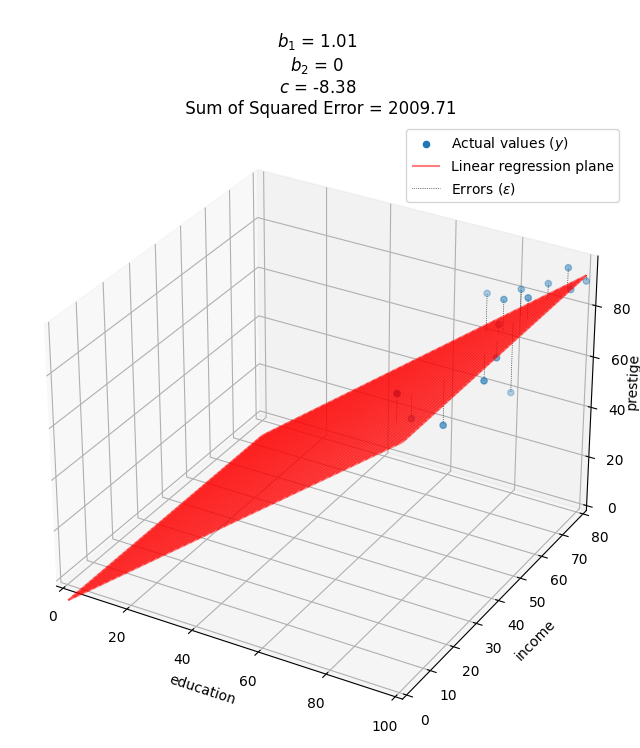

In [53]:
plot_model_3D(x1_slope = b_education, 
              x2_slope = 0, # ignore the second predictor
              c = c_education,
              
              # ignore code below this point, it just controls an optional printout
              return_errors = False)

Again, as you look at the 3D scatterplot, imagine it as a physical object.

Imagine you are standing in front of the `education` axis, where the axis label is, looking towards the "back wall" of the graph. 

![](images/look_ed_axis.png)

The edge of the plane would appear to you as a line, and assuming you were the right height, you would see something like this:

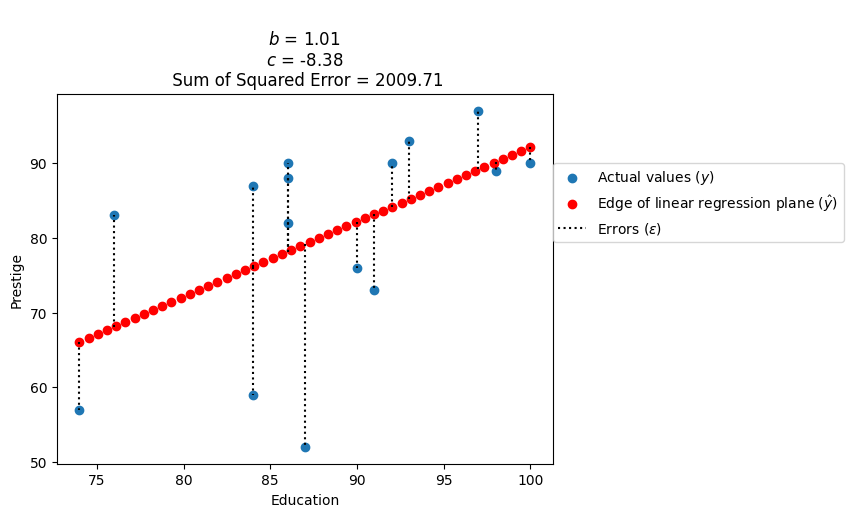

In [54]:
# show the linear regression, predicting `prestige` from `education`
make_scatter(x = education,
             y = prestige,
             b = b_education,
             c = c_education,
            with_errors = True,
            continuous_line = True,
            show = True)

Where the red line would be the edge of the regression plane.

This is the line of best fit from the single predictor linear regression - it **ignores** the other potential predictor variable `income`. It does not factor it into it's parameter estimates.

Likewise, the 3D scatterplot below is generated from the slope (`b_income`) and the intercept (`c_income`) which were obtained from the second single-predictor linear regression model that we fit on this page.

Now the slope for `education` is set to 0 (ignored) when generating the plane:

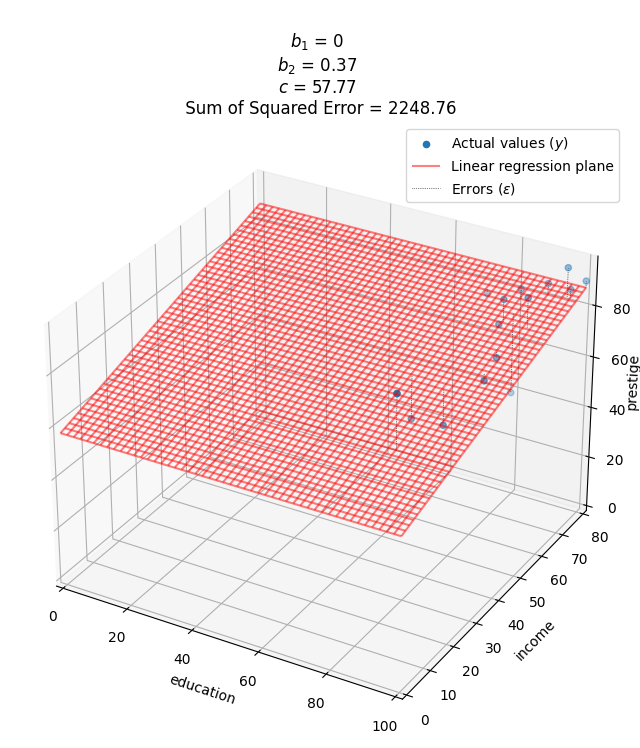

In [55]:
plot_model_3D(x1_slope = 0, 
              x2_slope = b_income,
              c = c_income,
                            
              # ignore code below this point, it just controls an optional printout
              return_errors = False)

Now imagine you are standing in front of the `income` axis, where the axis label is, looking towards the "left wall" of the graph. 

![](images/look_inc_axis.png)

Again, the edge of the plane would appear to you as a line, and assuming you were the right height, you would see something like this:

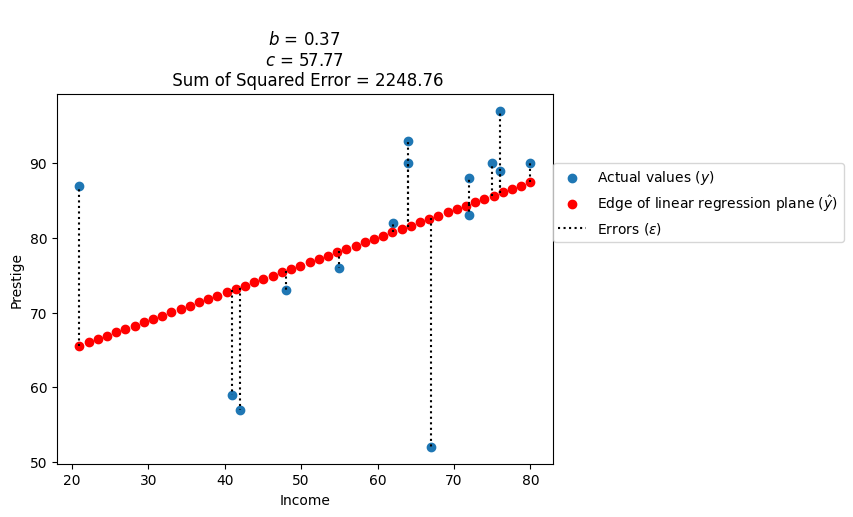

In [56]:
# show the linear regression, predicting `prestige` from `income`
errors_from_guess = make_scatter(b = b_income,
                                 c = c_income,
                                 x = income,
                                 xlabel = "Income",
                                 with_errors = True,
                                 show = True,
                                continuous_line = True)

When we fit a multiple regression model **both of these slopes are adjusted in light of the other**.

We get a regression plane that is fit to the datapoints using information from both predictor variables.

You can see that this changes the plane considerably, relatively to when we only consider one predictor variable. The graph below shows the best-fitting plane, fit by considering both predictor variables:

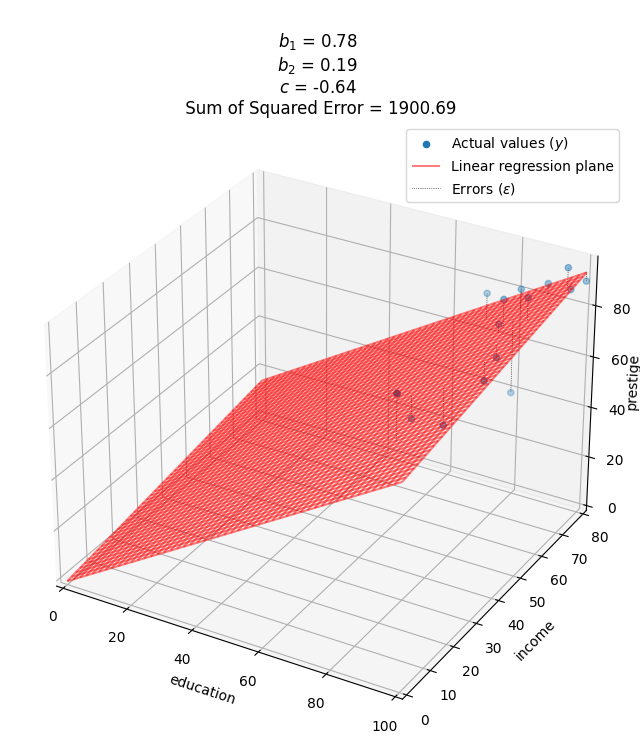

In [57]:
# the best-fitting plane
plot_model_3D(x1_slope = education_slope_two_predictor, 
              x2_slope = income_slope_two_predictor,
              c = intercept_two_predictor,

              # ignore code below this point, it just controls an optional printout
              return_errors = False)

## What is the meaning of the slopes?

Remember that in linear regression with a single predictor, the interpretation of the slope is:

> "The slope is the expected change in the outcome variable if we compared two observational units which differed only by 1 point on the predictor variable".

Again, if you imagine the graph as a physical object/space, if you imagine walking in a straight line up the regression plane in one direction, say you were walking in the direction of the `education` axis, from 0 to 100, but climbing the plane as you went. The slope of the plane in the other direction (along the `income` axis) would remain constant under your feet.

Similarly, if you imagine walking in the direction of the `income` axis, from 0 to 100, but climbing the plane as you went. The slope of the plane in the other direction (along the `education` axis) would remain constant under your feet.

Thus, the interpretation of each slope (now we have two slopes) in a multi-predictor linear regression is:

"The slope of a predictor variable (e.g. $b_1$) is the expected change in the outcome variable if we compared two observational units which differed only by 1 point on that predictor variable, *holding the other predictor constant*".

Probably the best (and simplest) way of thinking about this is that the estimate of the slope of one predictor ($x_1$) - which describes the relationship of that predictor and the outcome variable ($y$) - has been *adjusted* in light of the relationship between the other predictor ($x_2$) and the outcome ($y$).

This gives us an *estimate* of the expected change in the outcome variable if we compared two observational units which differed only by 1 point on that predictor variable, *but had the same score on the other predictor variable.*

How good this estimate is depends on how well our regression plane fits the underlying population of data that the sample was drawn from...a topic for a later class!

### A quick note on the intercept

The intercept is the point where the plane crosses the vertical axis (in our case the `prestige` axis) at the point where both the other axes (`education` and `income`) both equal 0. This is why the intercept is a single term, as there is only one point where this crossing occurs! If we didn't include an intercept then our plane would have to pass through the "origin" (e.g. 0 on all three axes) which would limit the number of planes we can fit. Including an intercept term let's us move the plane up and down the vertical axis when fitting it to the data points...

The plot below let's you use some sliders to manipulate a plane by changing the
values of the $x_1$ slope, the $x_2$ slope and the intercept. It also shows the
origin (where all three axes == 0) as a black dot.

*Note*: the axes are shown with values relevant to the dataset used on this
page - the plane itself is technically infinite, it runs on infinitely outside
of all the borders of the graph - a pretty cool concept!

In [58]:
# do not worry about this code, it just generates the interactive plot below
def plane_interact(x1_slope, x2_slope, intercept):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection='3d')

    x1 = np.linspace(0, 100, 100)
    x2 = np.linspace(0, 100, 100)
    x1_for_plot, x2_for_plot = np.meshgrid(x1, x2)

    y_for_plot = x1_slope * x1_for_plot + x2_slope * x2_for_plot + intercept

    ax.plot([0], [0], [0], marker='o', markersize=8, color='black', label='Origin (0,0,0)')
    ax.plot([0, 100], [0, 0], [0, 0], color = 'black', label = '$x_1$')
    ax.plot([0, 0], [0, 100], [0, 0], color = 'black', label = '$x_2$')
    ax.plot([0, 0], [0, 0], [0, 100], color = 'black', label = '$\hat{y}$')

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')
    ax.zaxis.labelpad=-3

    ax.plot_surface(x1_for_plot, x2_for_plot, y_for_plot)
    ax.set_title("$\hat{y}$"+f"= {x1_slope} * $x_1$ + {x2_slope} * $x_2$  + {intercept}")
    plt.legend(loc = (1, 1))

    plt.show()


interact(plane_interact, x1_slope = (-1, 1, 0.1), x2_slope = (-1, 1, 0.1), intercept = (-10, 10, 0.1))

interactive(children=(FloatSlider(value=0.0, description='x1_slope', max=1.0, min=-1.0), FloatSlider(value=0.0…

<function __main__.plane_interact(x1_slope, x2_slope, intercept)>